[Derivation of OLS](https://stats.stackexchange.com/questions/407594/calculating-bias-of-ml-estimate-of-ar1-coefficient)

In [24]:
import numpy as np
import scipy.linalg as scialg

In [161]:
# add diagonal
def get_M_r(T, r):
    M_r = np.zeros((T, T))
    M_r += np.diag(np.ones(T) * r)
    M_r[0][0] = 0
    M_r -= np.diag(np.ones(T - 1), -1)
    return M_r

def get_sigma_phi(T, phi):
    sigma = np.zeros((T, T))
    sigma += np.diag(np.ones(T))
    
    for k in range(1, T):
        sigma += np.diag(np.ones(T - k) * phi ** k, k)
        sigma += np.diag(np.ones(T - k) * phi ** k, -k)
        
    return sigma / (1 - phi ** 2)

def get_delta_phi(T, phi):
    return scialg.sqrtm(get_sigma_phi(T, phi))

def get_H_phi_r(T, phi, r):
    delta_phi = scialg.sqrtm(get_sigma_phi(T, phi))
    M_r = get_M_r(T, r)
    
    return delta_phi @ M_r @ delta_phi

def get_P(T, phi, r, iters = 100):
    count = 0
    for _ in range(iters):
        z = np.random.multivariate_normal(np.zeros(T), np.identity(T))
        count += z.T @ get_H_phi_r(T, phi, r) @ z >= 0
    return count / iters
        
    
# monte carlo mean estimate
phi = 0.7
T = 50
rs = np.linspace(phi - 0.3, phi + 0.275, 20)

means = []
old_p = 0
for r in rs:
    new_p = get_P(T, phi, r)
    p = new_p - old_p
    old_p = new_p
    print(r, p, end = "\t")
    means.append(p)
    
print(sum(means) / len(means))

0.39999999999999997 0.01	0.4302631578947368 0.019999999999999997	0.4605263157894737 0.0	0.4907894736842105 0.03	0.5210526315789473 0.020000000000000004	0.5513157894736842 0.05	0.581578947368421 0.06	0.6118421052631579 0.14	0.6421052631578947 0.03999999999999998	0.6723684210526315 0.07	0.7026315789473683 0.09000000000000002	0.7328947368421053 0.20999999999999996	0.763157894736842 0.050000000000000044	0.7934210526315788 0.12	0.8236842105263158 0.029999999999999916	0.8539473684210526 0.020000000000000018	0.8842105263157893 0.040000000000000036	0.9144736842105263 0.0	0.9447368421052631 0.0	0.975 0.0	0.05


0.6862894736842104


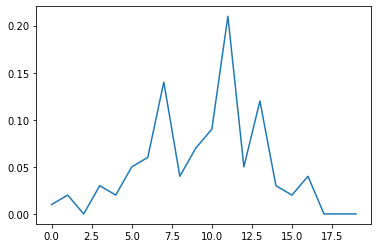

In [162]:
import matplotlib.pyplot as plt
plt.plot(means)
print((np.array(means) * rs).sum())

In [163]:
def gen_ar1(a, T, s = 1):
    X = np.zeros(T)
    X[0] = np.random.normal(0, 1 / (1 - a ** 2 + 0.01))

    for t in range(1, T):
        X[t] = a * X[t - 1] + np.random.normal(0, s)
        
    return X

iterations = 5000
a, T = 0.7, 50

a_list = []

for i in range(iterations):
    X = gen_ar1(a, T, 2)
    a_est = 1 / (X[:-1] @ X[:-1].T) * X[:-1] @ X[1:]
    a_list.append(a_est)

rnd = 3
print(f"\nValue for a:\t\t{round(np.mean(np.array(a_list)), rnd)} +/- {np.round(np.cov(np.array(a_list)), rnd)}.")


Value for a:		0.672 +/- 0.012.


In [168]:
X = gen_ar1(a, T, 2)
residuals = X[1:] - a * X[:-1]
print(1 / (X[:-1] @ X[:-1].T) * X[:-1] @ X[1:])
print(a + (residuals * X[:-1]).sum() / (X[:-1] ** 2).sum())

0.47011536259482084
0.4701153625948209
